In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import cv2
from tqdm import tqdm

In [4]:
data_path = '/kaggle/input/eye-diseases-classification/dataset/'

In [5]:
os.listdir(data_path)

['glaucoma', 'normal', 'diabetic_retinopathy', 'cataract']

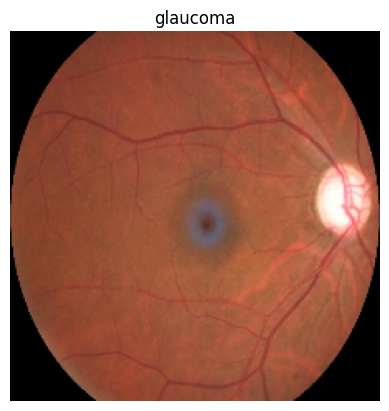

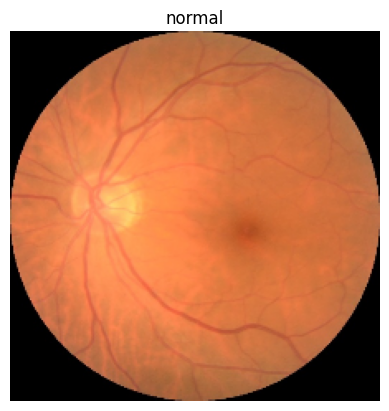

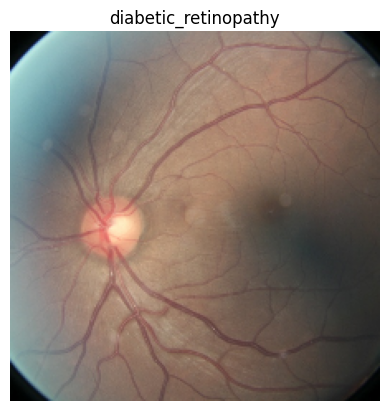

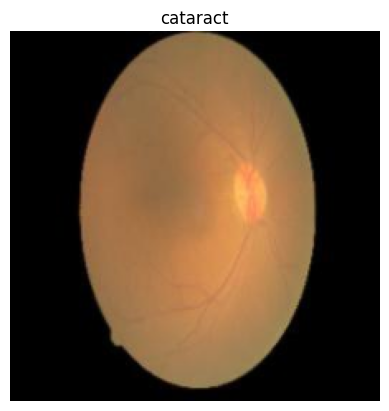

In [6]:
for i in os.listdir(data_path):
  for j in os.listdir(data_path+i):
    im = cv2.imread(data_path+i+"/"+j)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (224,224))
    plt.imshow(im)
    plt.axis("off")
    plt.title(i)
    plt.show()
    break

In [7]:
X = list()
y = list()
image_class = {"glaucoma":0, "normal":1,"diabetic_retinopathy":2,"cataract":3}
for i in os.listdir(data_path):
  class_dir = data_path+i+'/'
  for j in tqdm(os.listdir(class_dir)):
    origin_image = cv2.imread(class_dir+j)
    RGB_image = cv2.cvtColor(origin_image,cv2.COLOR_BGR2RGB)
    resize_image = cv2.resize(RGB_image, (96,96))
    X.append(resize_image)
    y.append(image_class[i])

100%|██████████| 1038/1038 [00:19<00:00, 52.58it/s]


In [8]:
X = np.array(X)
y = np.array(y)

In [9]:
X.shape, y.shape

((4217, 96, 96, 3), (4217,))

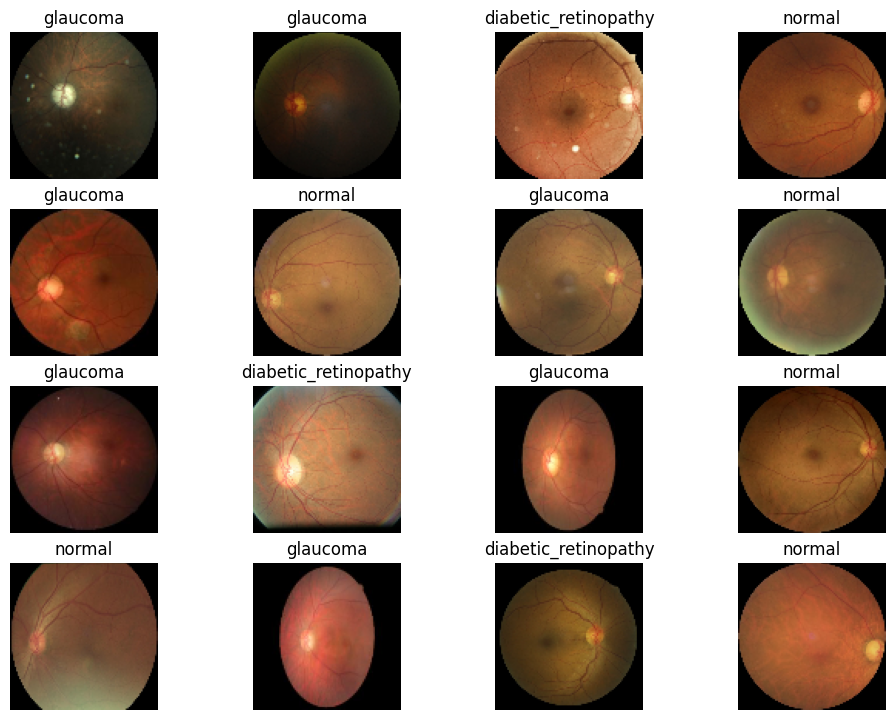

In [10]:
plt.figure(figsize=(12,18))
for n,i in enumerate(list(np.random.randint(1,len(X),16))):
  plt.subplot(8,4,n+1)
  plt.imshow(X[i])
  plt.axis("off")
  image_class = {0:"glaucoma",1:"normal",2:"diabetic_retinopathy",3:"cataract"}
  plt.title(image_class[y[i]])
plt.show()

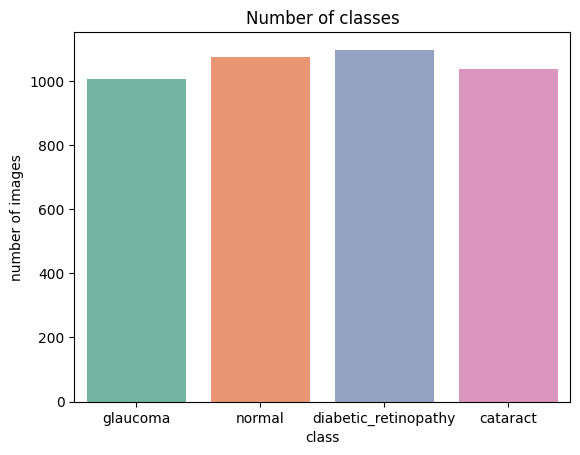

In [11]:
sns.countplot(x=y,palette="Set2")
plt.title("Number of classes")
plt.xticks(np.arange(4),os.listdir(data_path))
plt.xlabel("class")
plt.ylabel("number of images")
plt.show()

In [12]:
pd.Series(y).value_counts()

2    1098
1    1074
3    1038
0    1007
Name: count, dtype: int64

In [13]:
X = X/255.0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y, shuffle=True)

In [15]:
X_train.shape, X_test.shape

((3162, 96, 96, 3), (1055, 96, 96, 3))

In [17]:
model = keras.models.Sequential([
  keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu',padding='same', name='Conv1', input_shape=(96,96,3)),
              keras.layers.MaxPool2D(pool_size=2, strides=1, name='Pool1'),
  keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation='relu', name='Conv2', padding='same'),
              keras.layers.MaxPool2D(pool_size=2, strides=1, name='Pool2'),
  keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', name='Conv3', padding='same'),
              keras.layers.MaxPool2D(pool_size=2, strides=1, name='Pool3'),

  keras.layers.Flatten(name='Flatten1'),
  keras.layers.Dense(units=128, activation='relu', name='Dense1'),
  keras.layers.Dense(units=64, activation='relu', name='Dense2'),
  keras.layers.Dense(units=32, activation='relu', name='Dense3'),
  keras.layers.Dense(units=4, activation='softmax', name='Output')
])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 95, 95, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 95, 95, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 94, 94, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 94, 94, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 93, 93, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 2214144)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │   283,410,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,791,844 (1.06 GB)

 Trainable params: 283,791,844 (1.06 GB)

 Non-trainable params: 0 (0.00 B)

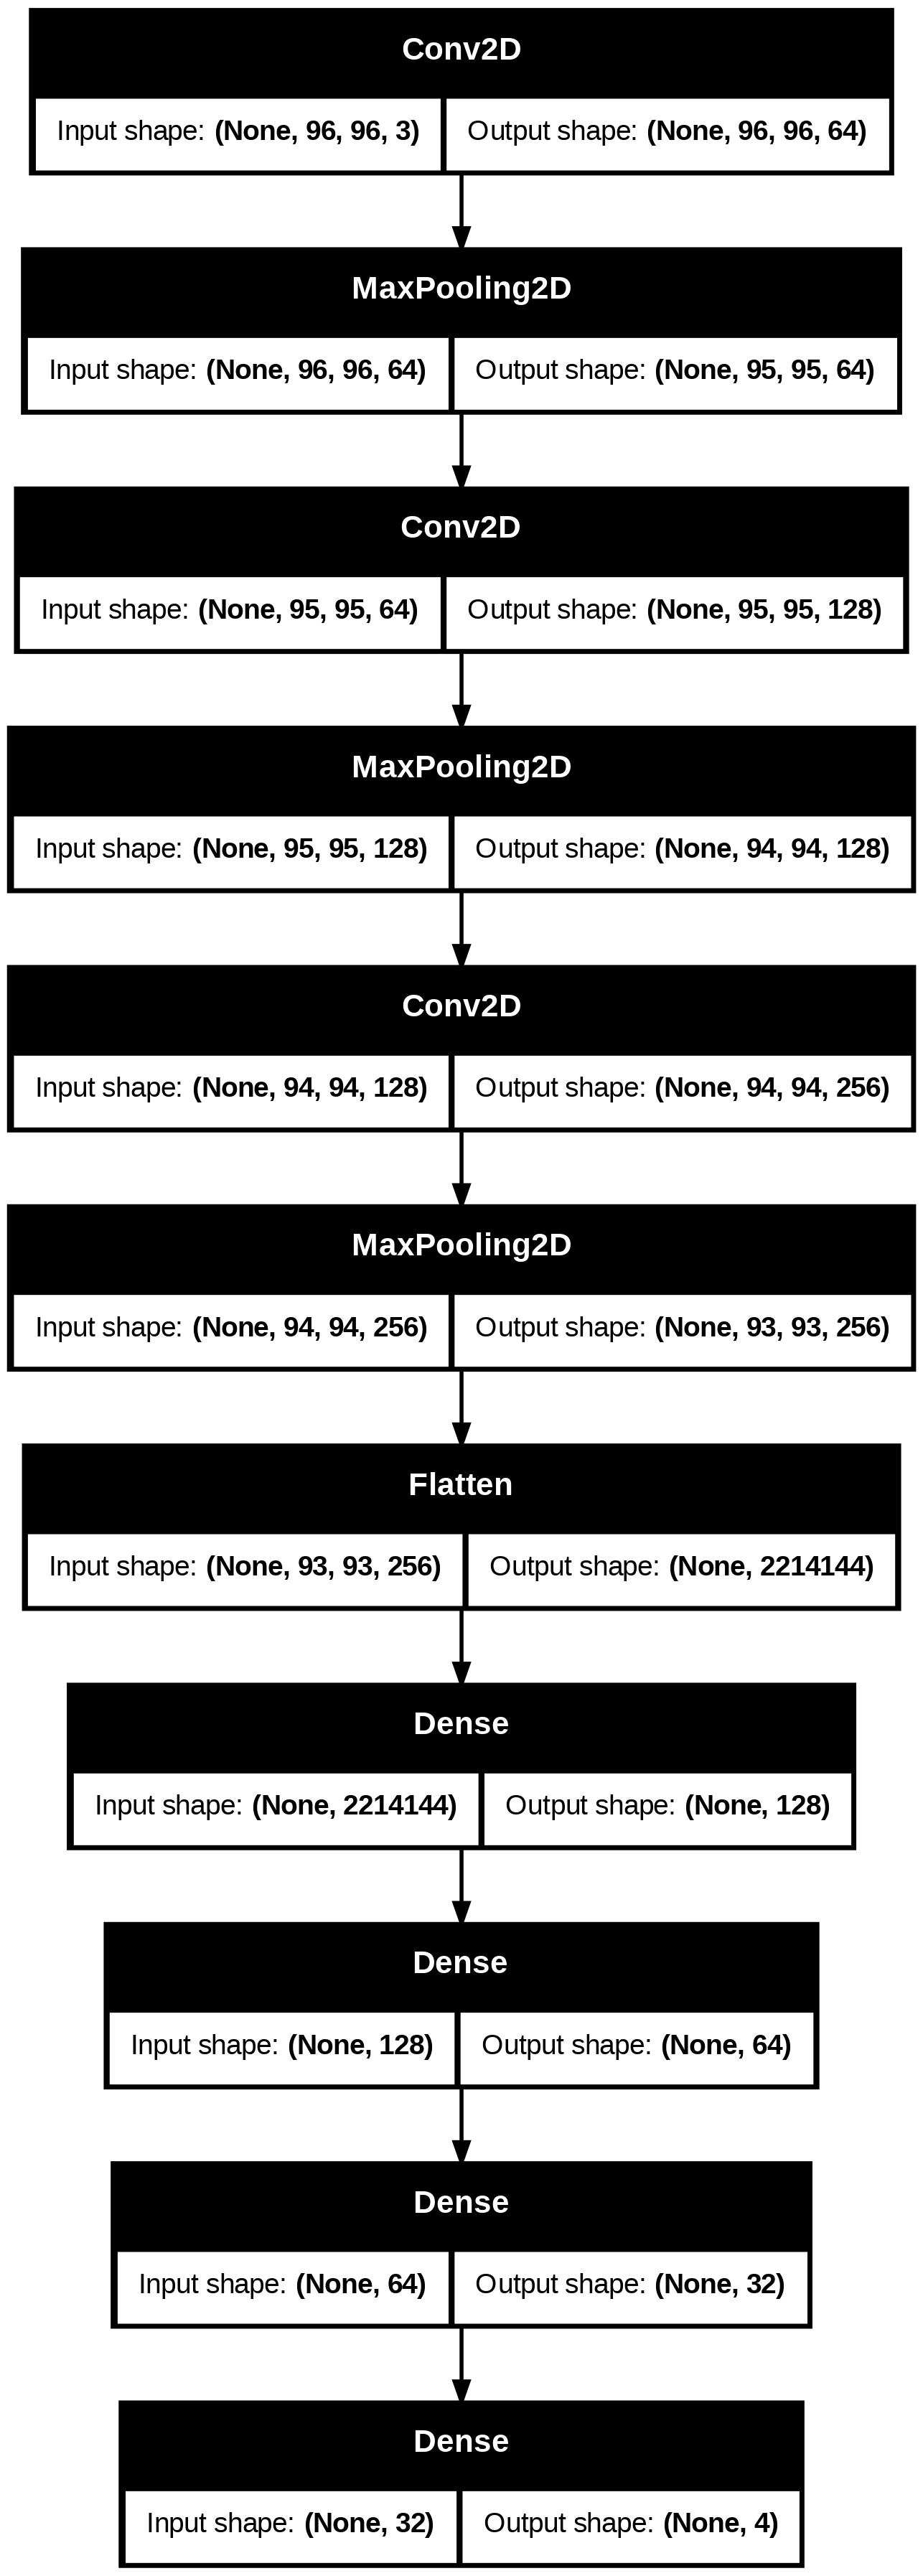

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=80, batch_size=16, validation_split=0.2)

Epoch 1/80


I0000 00:00:1766526293.055615     142 service.cc:148] XLA service 0x78682c029600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766526293.056305     142 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1766526293.056329     142 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1766526293.392100     142 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/159 ━━━━━━━━━━━━━━━━━━━━ 38:08 14s/step - accuracy: 0.3750 - loss: 1.3794

I0000 00:00:1766526304.340664     142 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


158/159 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.4403 - loss: 4.9180

E0000 00:00:1766526324.216735     139 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766526324.413087     139 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


159/159 ━━━━━━━━━━━━━━━━━━━━ 48s 214ms/step - accuracy: 0.4414 - loss: 4.8794 - val_accuracy: 0.5166 - val_loss: 0.9966
Epoch 2/80
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.5984 - loss: 0.8390 - val_accuracy: 0.6382 - val_loss: 0.7666
Epoch 3/80
159/159 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.6633 - loss: 0.7121 - val_accuracy: 0.7109 - val_loss: 0.6912
Epoch 4/80
159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.7332 - loss: 0.6004 - val_accuracy: 0.7251 - val_loss: 0.7555
Epoch 5/80
 12/159 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.7169 - loss: 0.6767